In [1]:
# MNIST
# Dataloader, Transformation
# Multilayer Neural Net, activation function
# Loss, optimizer
# Training loop (batch training)
# Model evaluation

In [2]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

In [3]:
# hyperparameters
input_size = 28*28
hidden_size = 100
num_classes = 10
n_epochs = 2
batch_size = 100
learning_rate = 0.001

In [4]:
# MNIST
train_dataset = torchvision.datasets.MNIST(root='./data', train=True,
                                           transform=transforms.ToTensor(), download=True)

test_dataset = torchvision.datasets.MNIST(root='./data', train=False,
                                           transform=transforms.ToTensor())

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

examples = iter(train_loader)
samples, labels = examples.next()
samples.shape, labels.shape

(torch.Size([100, 1, 28, 28]), torch.Size([100]))

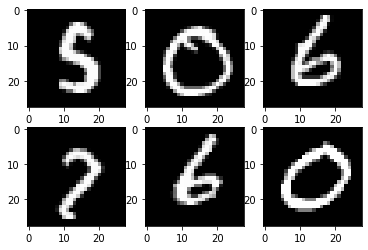

In [5]:
for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.imshow(samples[i][0], cmap='gray')
plt.show()

In [6]:
# neural net
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        self.l1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.l2 = nn.Linear(hidden_size, num_classes)
        
    def forward(self, x):
        out = self.l1(x)
        out = self.relu(out)
        out = self.l2(out)
        return out

model = NeuralNet(input_size, hidden_size, num_classes)

In [7]:
# loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [8]:
# training loop
n_total_steps = len(train_loader)
for epoch in range(n_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # we need to fix dimensions: [100, 1, 28, 28] -> [100, 784]
        images = images.reshape(-1, 28*28)
        
        # forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # backward pass
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (i+1) % 100 == 0:
            print(f'epoch {epoch+1}/{n_epochs}, step {i+1}/{n_total_steps}, loss = {loss.item():.4f}')

epoch 1/2, step 100/600, loss = 0.4217
epoch 1/2, step 200/600, loss = 0.2934
epoch 1/2, step 300/600, loss = 0.2927
epoch 1/2, step 400/600, loss = 0.2336
epoch 1/2, step 500/600, loss = 0.3566
epoch 1/2, step 600/600, loss = 0.2383
epoch 2/2, step 100/600, loss = 0.2041
epoch 2/2, step 200/600, loss = 0.2222
epoch 2/2, step 300/600, loss = 0.1698
epoch 2/2, step 400/600, loss = 0.3691
epoch 2/2, step 500/600, loss = 0.1628
epoch 2/2, step 600/600, loss = 0.1217


In [9]:
# test
with torch.no_grad():
    n_correct = 0
    n_samples = 0
    for images, labels in test_loader:
        images = images.reshape(-1, 28*28)
        outputs = model(images)
        
        # returns (value, index) pair
        _, predictions = torch.max(outputs, 1)
        n_samples += labels.shape[0]
        n_correct += (predictions == labels).sum().item()
        
    acc = 100 * n_correct / n_samples
    print(f'accuracy = {acc}')

accuracy = 95.2
